In [1]:
import torch
from sklearn.decomposition import PCA
import pandas as pd


class PCA2D(torch.nn.Module):
    def __init__(self, n_components=2):
        super(PCA2D, self).__init__()
        self.n_components = n_components
        self.pca = PCA(n_components=n_components)

    def forward(self, x):
        x = torch.Tensor(x.values)  # Convert DataFrame to NumPy array first
        x = self.pca.fit_transform(x)
        return x
    
from sklearn.manifold import TSNE
import torch

class TSNE2D(torch.nn.Module):
    def __init__(self, n_components=2):
        super(TSNE2D, self).__init__()
        self.n_components = n_components
        self.tsne = TSNE(n_components=n_components)

    def forward(self, x):
        x = torch.Tensor(x.values)  # Convert DataFrame to NumPy array first
        x = self.tsne.fit_transform(x)
        return x

c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

# open csv file as pandas dataframe
df = pd.read_csv(r'C:\Users\marco\OneDrive\Documenti\afc\afc_project\Diffusion-Models-for-Time-Series\data\TSLA\TSLA_2015-01-02_2015-01-30\TSLA_2015-01-05_34200000_57600000_message_10.csv', header=None)

In [3]:
# delete third column
df = df.drop(df.columns[2], axis=1)

# rename the columns into time, event_type, size, price, direction
df.columns = ['time', 'event_type', 'size', 'price', 'direction']

# divide the column time by 100000
df['time'] = df['time']/100000

# one hot encoding for the feature event_type
df = pd.get_dummies(df, columns=['event_type'])

# standardize the features size and price
df['price'] = (df['price'] - df['price'].mean())/df['price'].std()
df['size'] = (df['size'] - df['size'].mean())/df['size'].std()

# one hot encoding for the feature direction
df = pd.get_dummies(df, columns=['direction'])

In [4]:
pca2d = PCA2D(n_components=2).forward(df)

In [10]:
df_ = pd.read_csv(r'C:\Users\marco\OneDrive\Documenti\afc\afc_project\Diffusion-Models-for-Time-Series\data\TSLA\TSLA_2015-01-02_2015-01-30\TSLA_2015-01-06_34200000_57600000_message_10.csv', header=None)

# delete third column
df_ = df_.drop(df_.columns[2], axis=1)

# rename the columns into time, event_type, size, price, direction
df_.columns = ['time', 'event_type', 'size', 'price', 'direction']

# divide the column time by 100000
df_['time'] = df_['time']/100000

# one hot encoding for the feature event_type
df_ = pd.get_dummies(df_, columns=['event_type'])

# standardize the features size and price
df_['price'] = (df_['price'] - df_['price'].mean())/df_['price'].std()
df_['size'] = (df_['size'] - df_['size'].mean())/df_['size'].std()

# one hot encoding for the feature direction
df_ = pd.get_dummies(df_, columns=['direction'])
pca2d_ = PCA2D(n_components=2).forward(df_)

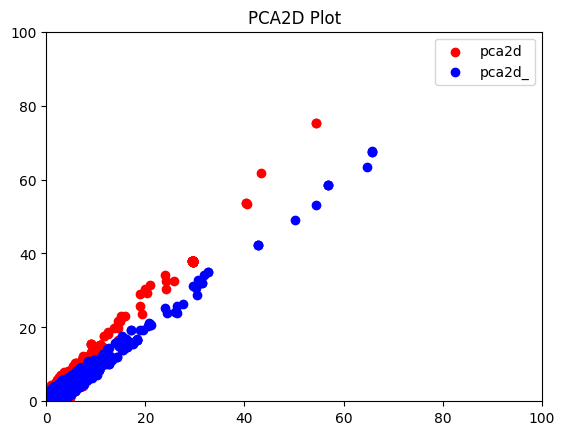

In [8]:
import matplotlib.pyplot as plt

# Plot pca2d in red
plt.scatter(pca2d[:, 0], pca2d[:, 1], color='red', label='pca2d')

# Plot pca2d_ in blue
plt.scatter(pca2d_[:, 0], pca2d_[:, 1], color='blue', label='pca2d_')

# Limit x and y axes
plt.xlim(0, 100)
plt.ylim(0, 100)

# Add legend and title
plt.legend()
plt.title('PCA2D Plot')

# Show the plot
plt.show()

######## QUESTO è ESEMPIO PCA ########